# Data Loading

In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=0027bc5f3c0769dc74fff8ceca737fd4448753585d65cdf1e0d06ddce5d70c7a
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [3]:
# see what already avail and thus determine which steps required prior to reading in file and handling the data
# if you see more than "sample_data" you can jump to the relevant step below
!ls

sample_data


In [4]:
# set-up spark (NB if Apache amend versions on download site we will need to amend path in wget command)
print("\nWelcome to advanced top sites")
!ls
!rm -f spark-3.3.[01]-bin-hadoop3.tgz* 
!rm -rf spark-3.3.[01]-bin-hadoop3
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar -xf spark-3.3.2-bin-hadoop3.tgz
!ls -alt



Welcome to advanced top sites
sample_data
--2023-05-31 23:18:22--  https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f8:10a:201a::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M  31.3MB/s    in 9.8s    

2023-05-31 23:18:32 (29.3 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]

total 292368
drwxr-xr-x  1 root root      4096 May 31 23:18 .
drwxr-xr-x  1 root root      4096 May 31 23:05 ..
drwxr-xr-x  1 root root      4096 May 30 13:34 sample_data
drwxr-xr-x  4 root root      4096 May 30 13:33 .config
-rw-r--r--  1 root root 299360284 Feb 10 21:28 spark-3.3.2-bin-hadoop3.tgz
drwxr-xr-x 13  501 1000      4096 Feb 10 20

In [5]:
# install findspark if not already installed
!pip3 install findspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# init spark (ensure SPARK_HOME set to same version as we download earlier)
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# the next line gives us 'local' mode. try 'local[2]' to use 2 cores or 'master:NNNN' to run on Spark standalone cluster at port NNNN
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
sc = SparkContext(conf=spark_conf)
# see what we have by examining the Spark User Interface
from pyspark.sql import *
from pyspark.sql.functions import *
# "SparkSession" and "sc" are are key handles in to Spark API
##SparkSession.builder.getOrCreate()
spark = SparkSession.builder.appName("bikes").getOrCreate()

In [7]:
# get file for given year from TfL open data
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip



--2023-05-31 23:18:48--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.101.13, 104.16.100.13
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.101.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M   240MB/s    in 0.9s    

2023-05-31 23:18:49 (240 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  i

# Second Hypothesis

"Cycle hire usage in London is influenced by temperature in 2014."

In [8]:
import pandas as pd

In [9]:
#Kaggle Api to download the dataset   - Download API Json From kaggle from Settings Option and upload in the below option

!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jestysebastian","key":"c579183ae64455898d03ac6a7a4c5ffa"}'}

In [11]:
!mkdir -p ~/.kaggle

!mv kaggle.json ~/.kaggle/

In [12]:
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
# Download the dataset

!kaggle datasets download -d emmanuelfwerr/london-weather-data

  0% 0.00/226k [00:00<?, ?B/s]
100% 226k/226k [00:00<00:00, 98.1MB/s]


In [14]:
!unzip london-weather-data.zip

Archive:  london-weather-data.zip
  inflating: london_weather.csv      


In [15]:
# FILE INPUT AND ANALYSED (presuming identical schema - should test first!)
weather_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load("./london_weather.csv")) # i.e pass a Python list of files to load (into a single DF)


In [16]:
weather_df.show(10)

+--------+-----------+--------+----------------+--------+---------+--------+-------------+--------+----------+
|    date|cloud_cover|sunshine|global_radiation|max_temp|mean_temp|min_temp|precipitation|pressure|snow_depth|
+--------+-----------+--------+----------------+--------+---------+--------+-------------+--------+----------+
|19790101|        2.0|     7.0|            52.0|     2.3|     -4.1|    -7.5|          0.4|101900.0|       9.0|
|19790102|        6.0|     1.7|            27.0|     1.6|     -2.6|    -7.5|          0.0|102530.0|       8.0|
|19790103|        5.0|     0.0|            13.0|     1.3|     -2.8|    -7.2|          0.0|102050.0|       4.0|
|19790104|        8.0|     0.0|            13.0|    -0.3|     -2.6|    -6.5|          0.0|100840.0|       2.0|
|19790105|        6.0|     2.0|            29.0|     5.6|     -0.8|    -1.4|          0.0|102250.0|       1.0|
|19790106|        5.0|     3.8|            39.0|     8.3|     -0.5|    -6.6|          0.7|102780.0|       1.0|
|

In [17]:
weather_df.dtypes

[('date', 'int'),
 ('cloud_cover', 'double'),
 ('sunshine', 'double'),
 ('global_radiation', 'double'),
 ('max_temp', 'double'),
 ('mean_temp', 'double'),
 ('min_temp', 'double'),
 ('precipitation', 'double'),
 ('pressure', 'double'),
 ('snow_depth', 'double')]

Preprocessing

In [18]:
from pyspark.sql.functions import unix_timestamp, col

# Specify the date columns to be converted to timestamp
date_columns = ["date"]

# Convert the date columns to timestamp format
for column in date_columns:
    weather_df = weather_df.withColumn(column, unix_timestamp(col(column).cast("string"), "yyyyMMdd").cast("timestamp"))
weather_df.show(10)

+-------------------+-----------+--------+----------------+--------+---------+--------+-------------+--------+----------+
|               date|cloud_cover|sunshine|global_radiation|max_temp|mean_temp|min_temp|precipitation|pressure|snow_depth|
+-------------------+-----------+--------+----------------+--------+---------+--------+-------------+--------+----------+
|1979-01-01 00:00:00|        2.0|     7.0|            52.0|     2.3|     -4.1|    -7.5|          0.4|101900.0|       9.0|
|1979-01-02 00:00:00|        6.0|     1.7|            27.0|     1.6|     -2.6|    -7.5|          0.0|102530.0|       8.0|
|1979-01-03 00:00:00|        5.0|     0.0|            13.0|     1.3|     -2.8|    -7.2|          0.0|102050.0|       4.0|
|1979-01-04 00:00:00|        8.0|     0.0|            13.0|    -0.3|     -2.6|    -6.5|          0.0|100840.0|       2.0|
|1979-01-05 00:00:00|        6.0|     2.0|            29.0|     5.6|     -0.8|    -1.4|          0.0|102250.0|       1.0|
|1979-01-06 00:00:00|   

In [19]:
from pyspark.sql.functions import when, year

# Filter the data to include only the year 2014
weather_df_2014 = weather_df.filter(year(weather_df.date) == 2014)

# Create a new column 'season' based on the specified dates
weather_df_2014 = weather_df_2014.withColumn('season', when((weather_df_2014.date >= '2014-03-20') & (weather_df_2014.date <= '2014-06-21'), 'Spring')
                                                       .when((weather_df_2014.date >= '2014-06-22') & (weather_df_2014.date <= '2014-09-22'), 'Summer')
                                                       .when((weather_df_2014.date >= '2014-09-23') & (weather_df_2014.date <= '2014-12-21'), 'Autumn')
                                                       .otherwise('Winter'))

# Group the dataset by season and perform aggregation
seasonal_stats_weather = weather_df_2014.groupBy('season').agg(avg('max_temp').alias('avg_max_temp'),
                                                            avg('mean_temp').alias('avg_mean_temp'),
                                                            avg('min_temp').alias('avg_min_temp'),
                                                            sum('precipitation').alias('total_precipitation'))

# Show the aggregated statistics by season
seasonal_stats_weather.show()


+------+------------------+------------------+------------------+-------------------+
|season|      avg_max_temp|     avg_mean_temp|      avg_min_temp|total_precipitation|
+------+------------------+------------------+------------------+-------------------+
|Spring| 17.81702127659575|13.367021276595743| 8.980851063829787| 187.00000000000006|
|Summer|23.049462365591395| 18.34086021505377|13.529032258064522| 171.19999999999993|
|Autumn|14.244444444444444|11.139999999999997| 7.934444444444443| 235.39999999999998|
|Winter|11.003409090909095|7.4556818181818185|             3.875|  270.3999999999999|
+------+------------------+------------------+------------------+-------------------+



Cycle Hire Data

In [48]:
# MULTIPLE FILES INPUT AND ANALYSED (presuming identical schema - should test first!)
file1="./1. Journey*csv" 
file2="./2. Journey*csv" 
file3="./3. Journey*csv" 
file4="./4. Journey*csv" 
file5="./5. Journey*csv" 
file6="./6. Journey*csv" 
file7="./7. Journey*csv" 
file8="./8a Journey*csv" 
file9="./8b Journey*csv" 
file10="./9a Journey*csv" 
file11="./9b Journey*csv" 
file12="./10a. Journey*csv" 
file13="./10b. Journey*csv" 
file14="./11a. Journey*csv" 
file15="./11b. Journey*csv" 
file16="./12a. Journey*csv" 
file17="./12b. Journey*csv" 
file18="./13a. Journey*csv" 
file19="./13b. Journey*csv" 
file20="./14. Journey*csv" 

# we might say therefore that data in these 5 files corresponds to "autumn" in the UK
cycle_hire_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load([file1,file2,file3,file4,file5,
                file6,file7,file8,file9,file10,
                file11,file12,file13,file14,file15,
                file16,file17,file18,file19,file20
])) # i.e pass a Python list of files to load (into a single DF)

In [49]:
cycle_hire_df.show(10)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 34263367|    1080|   9076|24/06/2014 00:57|          695|Islington Green, ...|24/06/2014 00:39|            311|Foley Street, Fit...|
| 34603487|     660|   6328|03/07/2014 11:51|          695|Islington Green, ...|03/07/2014 11:40|             22|Northington Stree...|
| 34689078|     120|   2006|05/07/2014 15:09|          357|Howland Street, F...|05/07/2014 15:07|            311|Foley Street, Fit...|
| 34724273|    1260|   7904|06/07/2014 16:35|          695|Islington Green, ...|06/07/2014 16:14|            311|Foley Street, Fit...|
| 34956750|    1500|   8251|13/07/2014 00:41|          

In [50]:
cycle_hire_df = cycle_hire_df.withColumn("Duration", col("Duration").cast("float")) 

In [51]:
# Specify the date columns to be converted to timestamp
date_columns = ["End Date", "Start Date"]

# Convert the date columns to timestamp format
for column in date_columns:
    cycle_hire_df = cycle_hire_df.withColumn(column, to_timestamp(col(column), "dd/MM/yyyy HH:mm"))

In [52]:
cycle_hire_df.dtypes

[('Rental Id', 'string'),
 ('Duration', 'float'),
 ('Bike Id', 'string'),
 ('End Date', 'timestamp'),
 ('EndStation Id', 'string'),
 ('EndStation Name', 'string'),
 ('Start Date', 'timestamp'),
 ('StartStation Id', 'string'),
 ('StartStation Name', 'string')]

Dealing with missing values and outliers

In [53]:
from pyspark.sql.functions import col, sum

# Check for missing values in each column
missing_values = cycle_hire_df.agg(*[
    sum(col(column).isNull().cast("integer")).alias(column)
    for column in cycle_hire_df.columns
])

# Display the count of missing values in each column
missing_values.show()


+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|  1239113| 1239113|1239113| 1239113|      1239245|        1239245|   1239113|        1239113|          1239113|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [54]:
from pyspark.sql.functions import col

# Remove rows with missing values in 'Duration' column
cycle_hire_df = cycle_hire_df.filter(col('Duration').isNotNull())

# Verify the removal of rows with missing values
missing_values_after_removal = cycle_hire_df.agg(*[
    sum(col(column).isNull().cast("integer")).alias(column)
    for column in cycle_hire_df.columns
])

# Display the count of missing values after removal
missing_values_after_removal.show()


+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|        0|       0|      0|       0|          132|            132|         0|              0|                0|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [55]:
cycle_hire_df.count()

10242483

In [56]:
# Filter the DataFrame to select rows with duration below 0
negative_duration_df = cycle_hire_df.filter(col("Duration") < 0)

# Show the resulting rows
negative_duration_df.count()


149

In [57]:
# Filter the DataFrame to remove rows with duration below 0
cycle_hire_df = cycle_hire_df.filter(col("Duration") >= 0)


In [58]:
# Rename the column "Start Date" to "Start_Date"
cycle_hire_df = cycle_hire_df.withColumnRenamed("Start Date", "Start_Date")


In [60]:
from pyspark.sql.functions import when, year
# Create a new column 'season' based on the specified dates
cycle_hire_df = cycle_hire_df.withColumn('season', when((cycle_hire_df.Start_Date >= '2014-03-20') & (cycle_hire_df.Start_Date <= '2014-06-21'), 'Spring')
                                                       .when((cycle_hire_df.Start_Date >= '2014-06-22') & (cycle_hire_df.Start_Date <= '2014-09-22'), 'Summer')
                                                       .when((cycle_hire_df.Start_Date >= '2014-09-23') & (cycle_hire_df.Start_Date <= '2014-12-21'), 'Autumn')
                                                       .otherwise('Winter'))

# Group the dataset by season and perform aggregation
seasonal_stats_cycle_hire = cycle_hire_df.groupBy('season').agg(sum('duration').alias('total_duration'))
                                                     

# Show the aggregated statistics by season
seasonal_stats_cycle_hire.show()


+------+--------------+
|season|total_duration|
+------+--------------+
|Summer|   5.0668986E9|
|Spring|  4.01692626E9|
|Winter|  2.93944776E9|
|Autumn|   2.9933253E9|
+------+--------------+



Correlation Analysis

In [87]:
weather_df_2014.show(1)

+-------------------+-----------+--------+----------------+--------+---------+--------+-------------+--------+----------+------+
|               date|cloud_cover|sunshine|global_radiation|max_temp|mean_temp|min_temp|precipitation|pressure|snow_depth|season|
+-------------------+-----------+--------+----------------+--------+---------+--------+-------------+--------+----------+------+
|2014-01-01 00:00:00|        6.0|     0.0|            13.0|    11.1|      8.5|     5.6|         13.8| 99300.0|       0.0|Winter|
+-------------------+-----------+--------+----------------+--------+---------+--------+-------------+--------+----------+------+
only showing top 1 row



In [62]:
cycle_hire_df.show(1)

+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+------+
|Rental Id|Duration|Bike Id|           End Date|EndStation Id|     EndStation Name|         Start_Date|StartStation Id|   StartStation Name|season|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+------+
| 34263367|  1080.0|   9076|2014-06-24 00:57:00|          695|Islington Green, ...|2014-06-24 00:39:00|            311|Foley Street, Fit...|Summer|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+------+
only showing top 1 row



In [63]:
# Perform the join based on the 'season' column
merged_df = weather_df_2014.join(cycle_hire_df, on='season')

# Show the merged DataFrame
merged_df.show(1)


+------+-------------------+-----------+--------+----------------+--------+---------+--------+-------------+--------+----------+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+
|season|               date|cloud_cover|sunshine|global_radiation|max_temp|mean_temp|min_temp|precipitation|pressure|snow_depth|Rental Id|Duration|Bike Id|           End Date|EndStation Id|     EndStation Name|         Start_Date|StartStation Id|   StartStation Name|
+------+-------------------+-----------+--------+----------------+--------+---------+--------+-------------+--------+----------+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+
|Summer|2014-09-22 00:00:00|        0.0|    10.3|           175.0|    19.1|     13.4|     7.4|          0.0|102590.0|       0.0| 34263367|  1080.0|   9076|2014-06-24 00:57:00|          695|Islingt

In [66]:
season = merged_df.select('season').distinct().rdd.flatMap(lambda x: x).collect()
season


['Summer', 'Spring', 'Winter', 'Autumn']

In [ ]:
import matplotlib.pyplot as plt

# Group data by season and calculate average temperature
season_avg_temp = merged_df.groupBy('Season').agg({'mean_temp': 'mean'}).collect()

# Extract season and average temperature values
seasons = [row['Season'] for row in season_avg_temp]
avg_temps = [row['avg(mean_temp)'] for row in season_avg_temp]


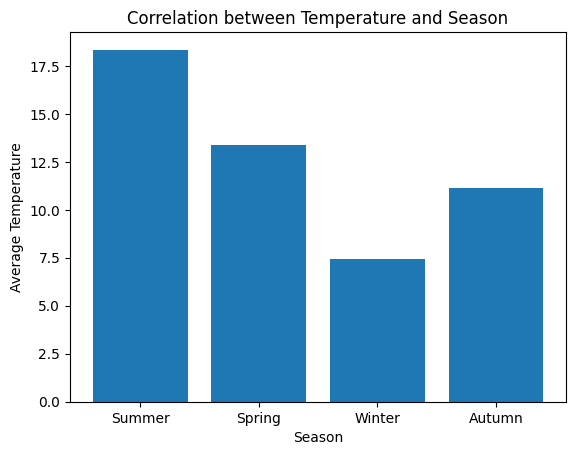

In [76]:
# Create a bar plot
plt.bar(seasons, avg_temps)
plt.xlabel('Season')
plt.ylabel('Average Temperature')
plt.title('Correlation between Temperature and Season')
plt.show()

In [67]:
from pyspark.sql.functions import avg

# Calculate the correlation coefficient between average temperature and total cycle hire usage for each season
correlation_df = merged_df.groupBy('season').agg(avg('mean_temp').alias('avg_temperature'), sum('duration').alias('total_duration'))
correlation_coefficient = correlation_df.stat.corr('avg_temperature', 'total_duration')

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: 0.9525522691199692


In [68]:
from scipy.stats import t
import numpy as np

# Define the number of observations
n = correlation_df.count()

# Define the degrees of freedom
df = n - 2

# Calculate the t-statistic
t_statistic = correlation_coefficient * np.sqrt(df / (1 - correlation_coefficient ** 2))

# Set the significance level (alpha)
alpha = 0.05

# Calculate the critical t-value
critical_t = t.ppf(1 - alpha / 2, df)

# Compare the calculated t-statistic with the critical t-value
if np.abs(t_statistic) > critical_t:
    print("The correlation coefficient is statistically significant.")
else:
    print("The correlation coefficient is not statistically significant.")


The correlation coefficient is statistically significant.
